In [ ]:
%load_ext autoreload
%autoreload 2

# Predicting RNA Structure and similarity


RNAstructure: https://rna.urmc.rochester.edu/Text/index.html

RNAstructure (dynalign): https://rna.urmc.rochester.edu/Text/dynalign.html

ViennaRNA: https://www.tbi.univie.ac.at/RNA/ 
- alifold
- fold (RNAfold)

VARNA (visualisation): https://htyao.gitlab.io/varna-api/drawing/ 

## Imports

In [ ]:
import ViennaRNA
import os
import numpy as np

In [12]:

s = ''
seq = 'ATTCGGAACGAGGCCTGAAGCAGTGTCGCCGTCCCTCTGCCTTGCACAAAAAGCACAAGCATTCCTTAGCAGCTCAGGCGCACCTANGTGGGAGCCCAGCACACTGCTTCTCGGAGGCCAGGCCCTCCTGCTGGCTGAGGCTTGGGCCCAGTAGCCCCAATATGGTGGCCCTGGGGAAGAGGCCTTGGGGGTCTGCTCTGTGCCTGGGATCAGTGGGGNCCCAAANGCCAGCCCTNCTGANCAACATTNAAAATGNACAAAACCTNGGGGACTTTTGNTTTTGNTTTTNCCCTT'
folded = ViennaRNA.fold(seq, s)
folded

['........(.((((..((((((((((.((..((((.(((((((((.......((....))........)))....))))).......).)))).....)))))))))))).(((((..(((((((((.........(((((((...(((((..((((((...))).))).)))))....))))))))))))))))))))).)))).)(.((((.((((.............)))).)))).)........................((((...................)))).',
 -91.30000305175781]

['java', '-cp', './VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'ATTCGGAACGAGGCCTGAAGCAGTGTCGCCGTCCCTCTGCCTTGCACAAAAAGCACAAGCATTCCTTAGCAGCTCAGGCGCACCTANGTGGGAGCCCAGCACACTGCTTCTCGGAGGCCAGGCCCTCCTGCTGGCTGAGGCTTGGGCCCAGTAGCCCCAATATGGTGGCCCTGGGGAAGAGGCCTTGGGGGTCTGCTCTGTGCCTGGGATCAGTGGGGNCCCAAANGCCAGCCCTNCTGANCAACATTNAAAATGNACAAAACCTNGGGGACTTTTGNTTTTGNTTTTNCCCTT', '-structureDBN', '........(.((((..((((((((((.((..((((.(((((((((.......((....))........)))....))))).......).)))).....)))))))))))).(((((..(((((((((.........(((((((...(((((..((((((...))).))).)))))....))))))))))))))))))))).)))).)(.((((.((((.............)))).)))).)........................((((...................)))).', '-o', '/tmp/tmpm5jpvj3d.png', '-resolution', '10']


Output file: /tmp/tmpm5jpvj3d.png



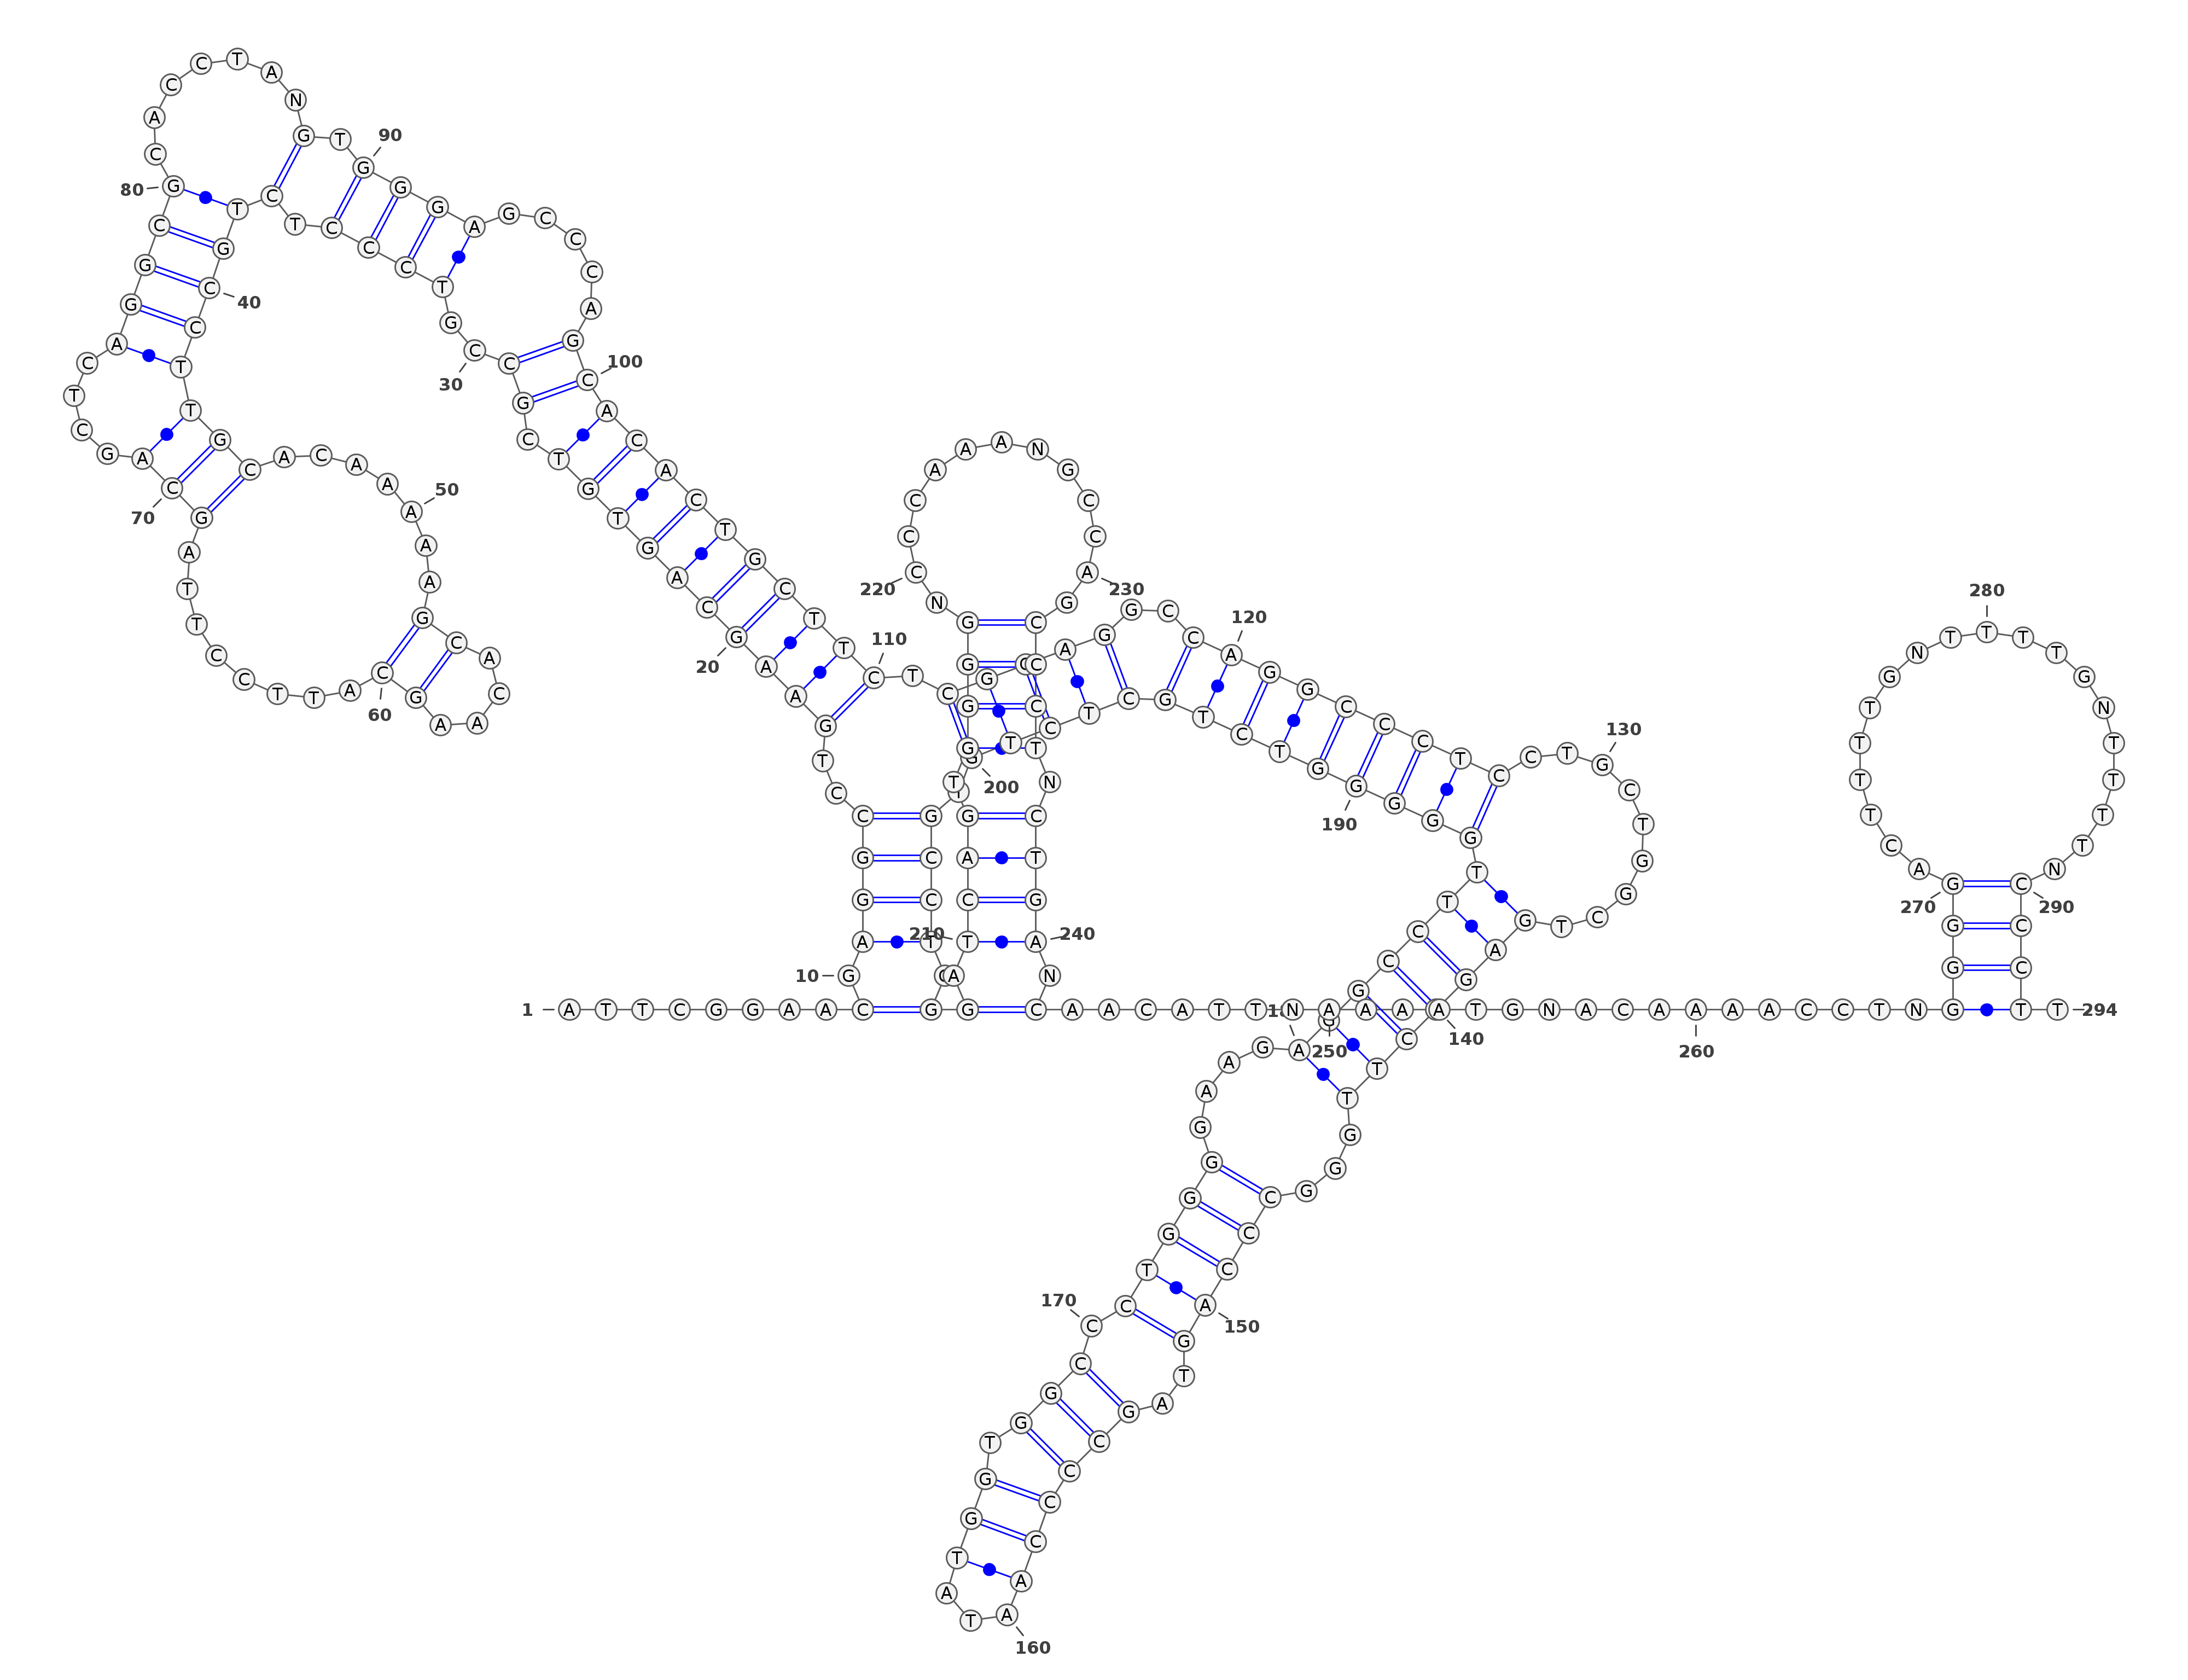

In [26]:
from varnaapi import Structure

v = Structure(structure=folded[0], sequence=seq)
v._params['resolution'] = 10
v.show()
# v.savefig("example.png", show=True)

# Load data

In [ ]:
# fn = './data/05_orthogonality_mRNA_official/2023_11_08_145023/inter_data_raw.json'
fn = './data/05_orthogonality_mRNA_official/2023_11_21_095238/inter_data_raw.json'

sim_data_l = load_json_as_dict(fn)


In [ ]:

    
def process_bplist(bplist, idx):
    return [int(i.replace(')', ',').split(',')[idx]) for i in bplist.split('(')[1:]]
        
        